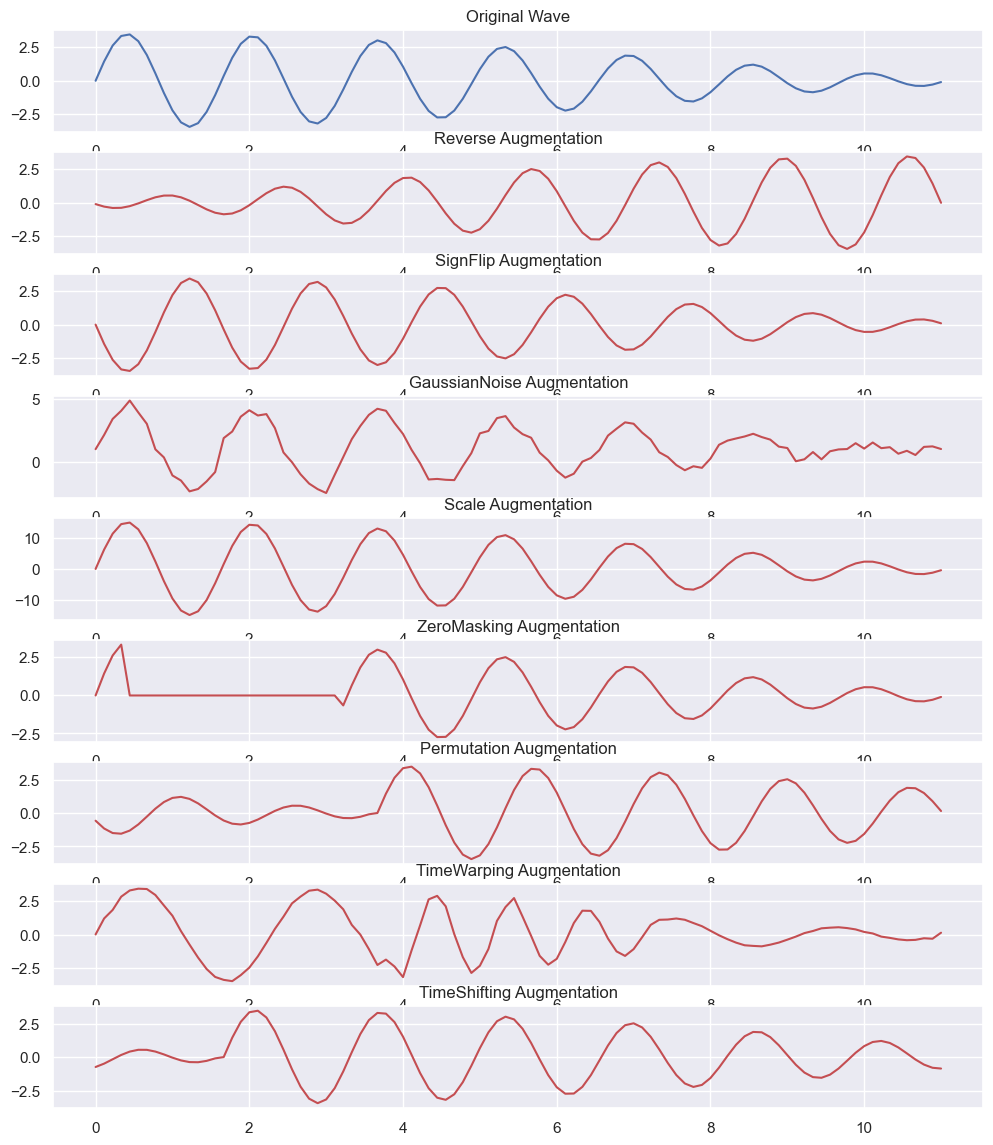

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from base_augmentations import *
from signal_augmentations import *

# Generate random sine wave
num_points = 100
time = torch.linspace(0, 11, num_points)
amplitude = torch.rand(1) * 2 + 1
frequency = torch.rand(1) * 4 + 2
wave = torch.sin(frequency * time) * amplitude

time = torch.linspace(0, 11, num_points)
amplitude = torch.rand(1) * 2 + 1
frequency = torch.rand(1) * 2 + 2
wave = wave+torch.sin(frequency * time) * amplitude

wave = wave.unsqueeze(0)

# Define augmentations
augmentations = [
    ("Reverse", Reverse()),
    ("SignFlip", SignFlip()),
    ("GaussianNoise",GaussianNoise(1,0.3)),
    ("Scale",Scale(5)),
    ("ZeroMasking",ZeroMasking(25)),
    ("Permutation",Permutation(max_segments=7,min_segments=3)),
    ("TimeWarping",TimeWarping(num_segments=4,warp_factor=1.5)),
    ("TimeShifting",TimeShifting(25)),
]

# Create multi-plot using Seaborn
sns.set(style="darkgrid")

# Plot original wave
plt.figure(figsize=(12, 14))
plt.subplot(len(augmentations) + 1, 1, 1)
plt.plot(time, wave.numpy()[0], color='b')
plt.title('Original Wave')

# Apply augmentations and plot
for i, (aug_name, aug) in enumerate(augmentations):
    augmented_wave = aug(wave)
    
    plt.subplot(len(augmentations) + 1, 1, i + 2)
    plt.plot(time, augmented_wave.numpy()[0], color='r')
    plt.title(aug_name + ' Augmentation')

# Display the plot
#plt.tight_layout()
plt.show()
#sanity check to see if the original wave was not destructed
#plt.plot(time, wave.numpy()[0], color='b')
